In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [166]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')

In [75]:
data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [88]:
data.shape

(31647, 18)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [78]:
data.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [79]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

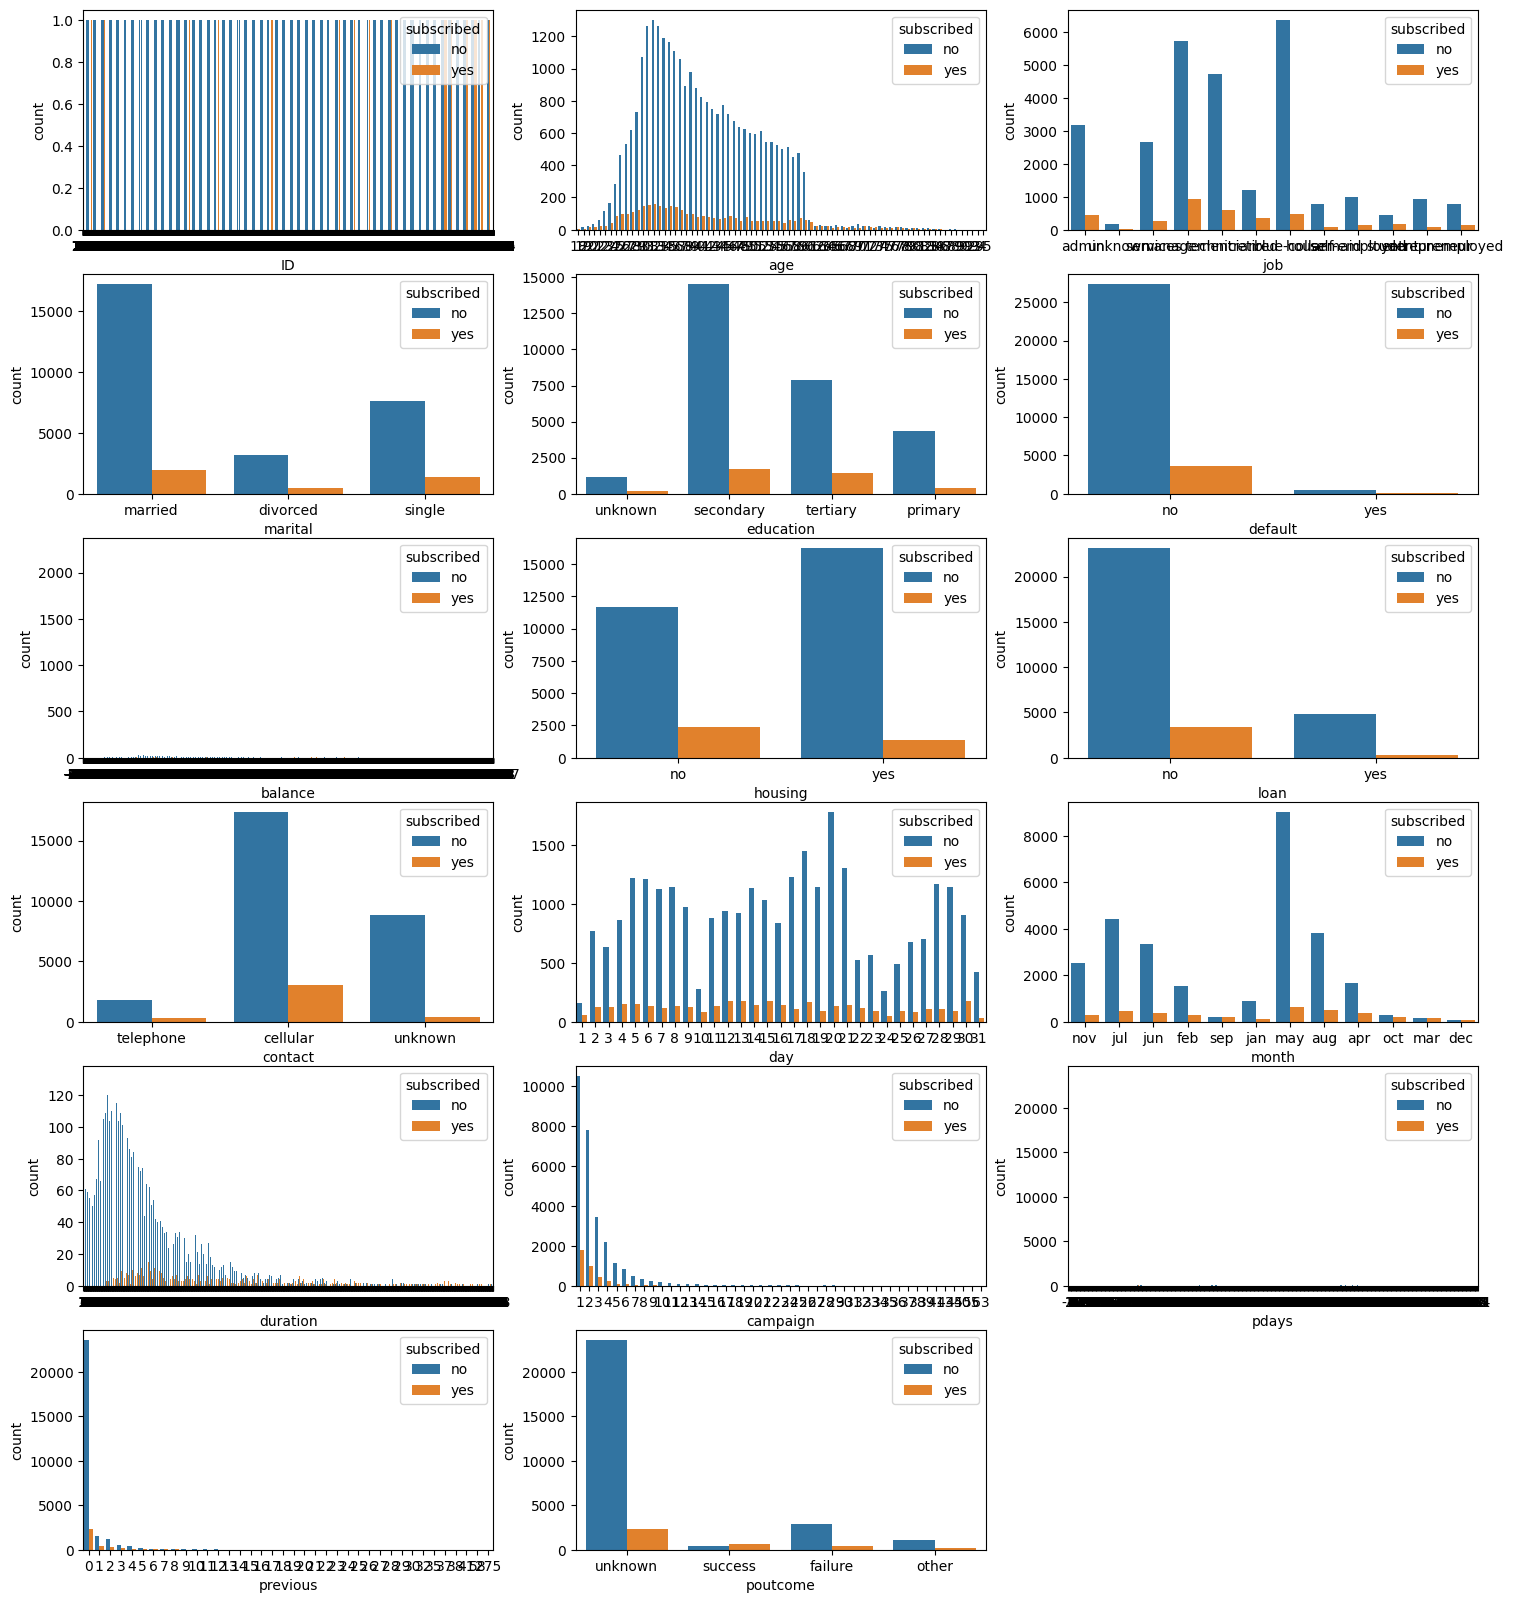

In [ ]:
plt.figure(figsize = (18,20))
plotnumber = 1
for col in data.columns:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(x = data[col], hue=data['subscribed'])
        plt.xlabel(col)
        plotnumber +=1

In [167]:
from sklearn.preprocessing import LabelEncoder

In [168]:
le = LabelEncoder()
for i in data.columns:
  if data[i].dtype == 'object':
      data[i] = le.fit_transform(data[i])

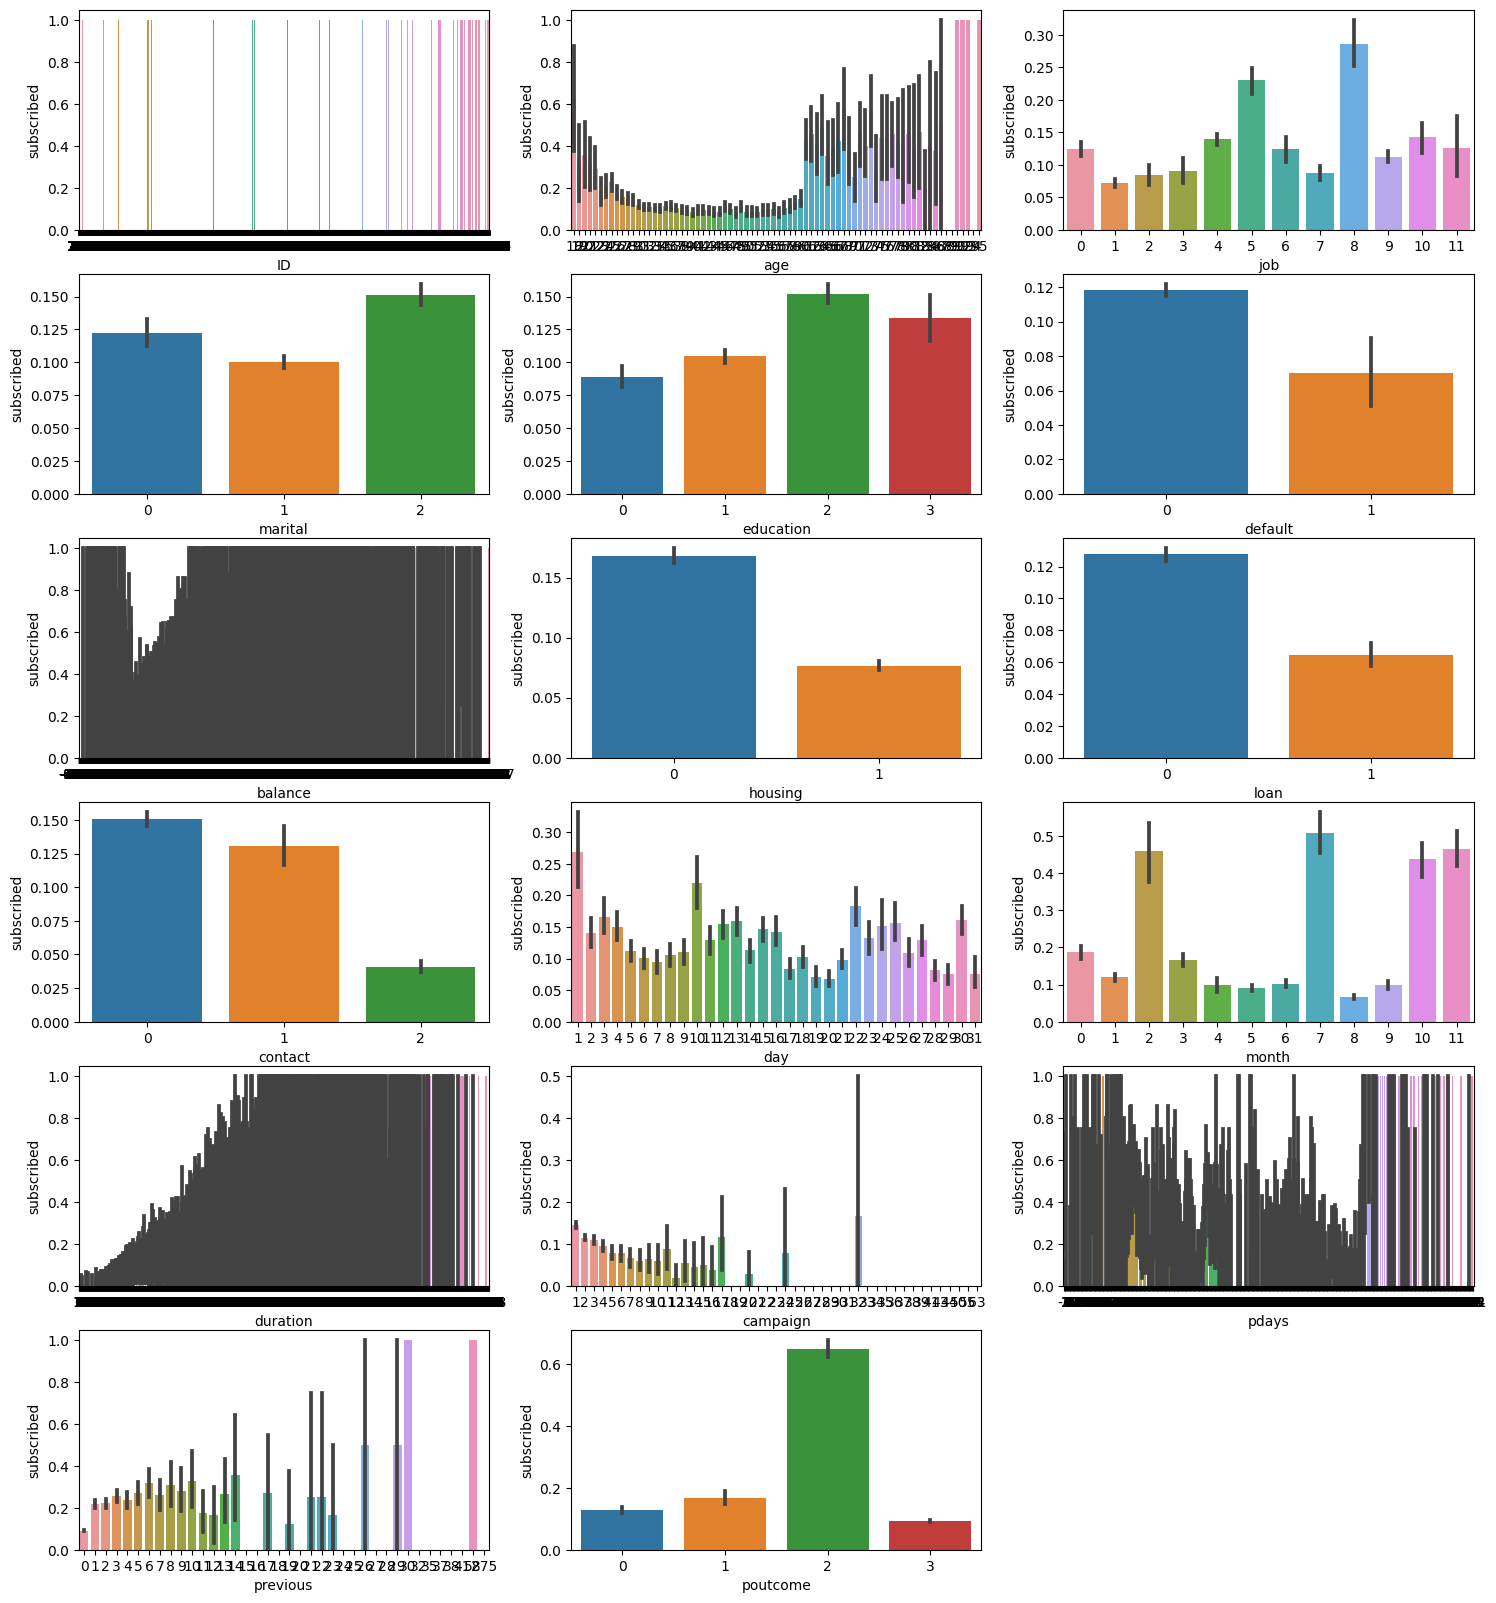

In [ ]:
plt.figure(figsize = (18,20))
plotnumber = 1
for col in data.columns:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.barplot(x = data[col], y=data['subscribed'])
        plt.xlabel(col)
        plt.ylabel('subscribed')
        plotnumber +=1



1.   Most of the clients have housing loan and the clients who dont have housing loan are more likely to subscribe for the term deposite


2.   most clients have 'secondary' level of education. clients who have education level 'secondary' and 'tertiary' are more likely to subscribe.

3. given the fact that the number of students or retired are not that many in our database, the rate of subscribers is quite high in these job categories



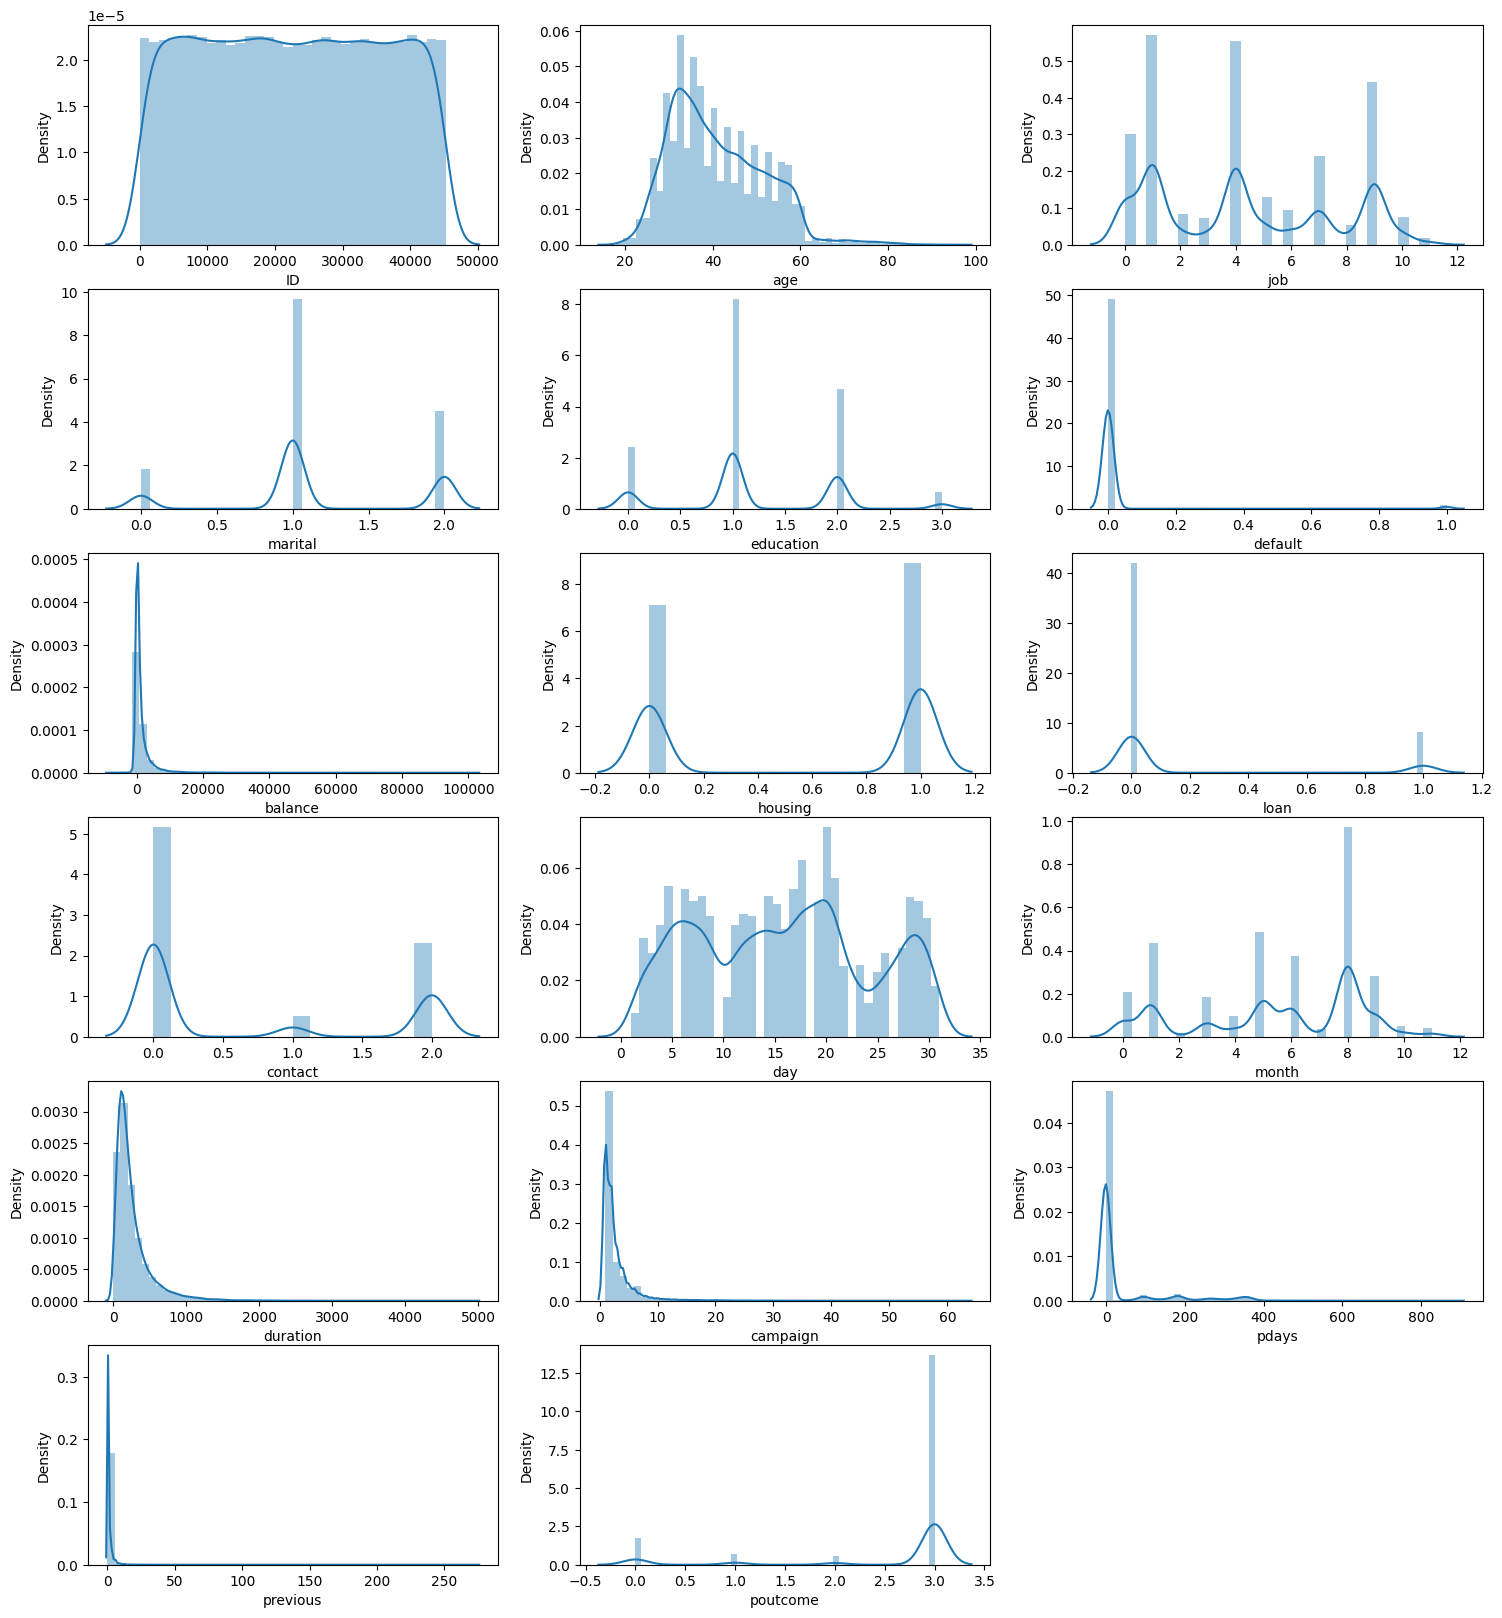

In [ ]:
plt.figure(figsize = (18,20))
plotnumber = 1
for col in data.columns:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col)
        plotnumber +=1

In [82]:
data.skew()

ID             0.005851
age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

In [112]:
skewed_cols = data[['balance','duration','campaign','pdays','previous']]

In [115]:
Q1 =  skewed_cols.quantile(0.25)
Q3 =  skewed_cols.quantile(0.75)
IQR = Q3 - Q1
Upper = Q3+(1.5*IQR)
data1 = data[(data> Upper).any(axis=1)]

In [117]:
data1.shape

(11694, 18)

WE lose a lot of data by using quartiles for outlier removal so we try zscore instead

In [118]:
from scipy.stats import zscore

In [169]:
z = np.abs(zscore(skewed_cols))

In [170]:
data2 = data[(z<3).all(axis=1)]

In [171]:
data2.shape

(28371, 18)

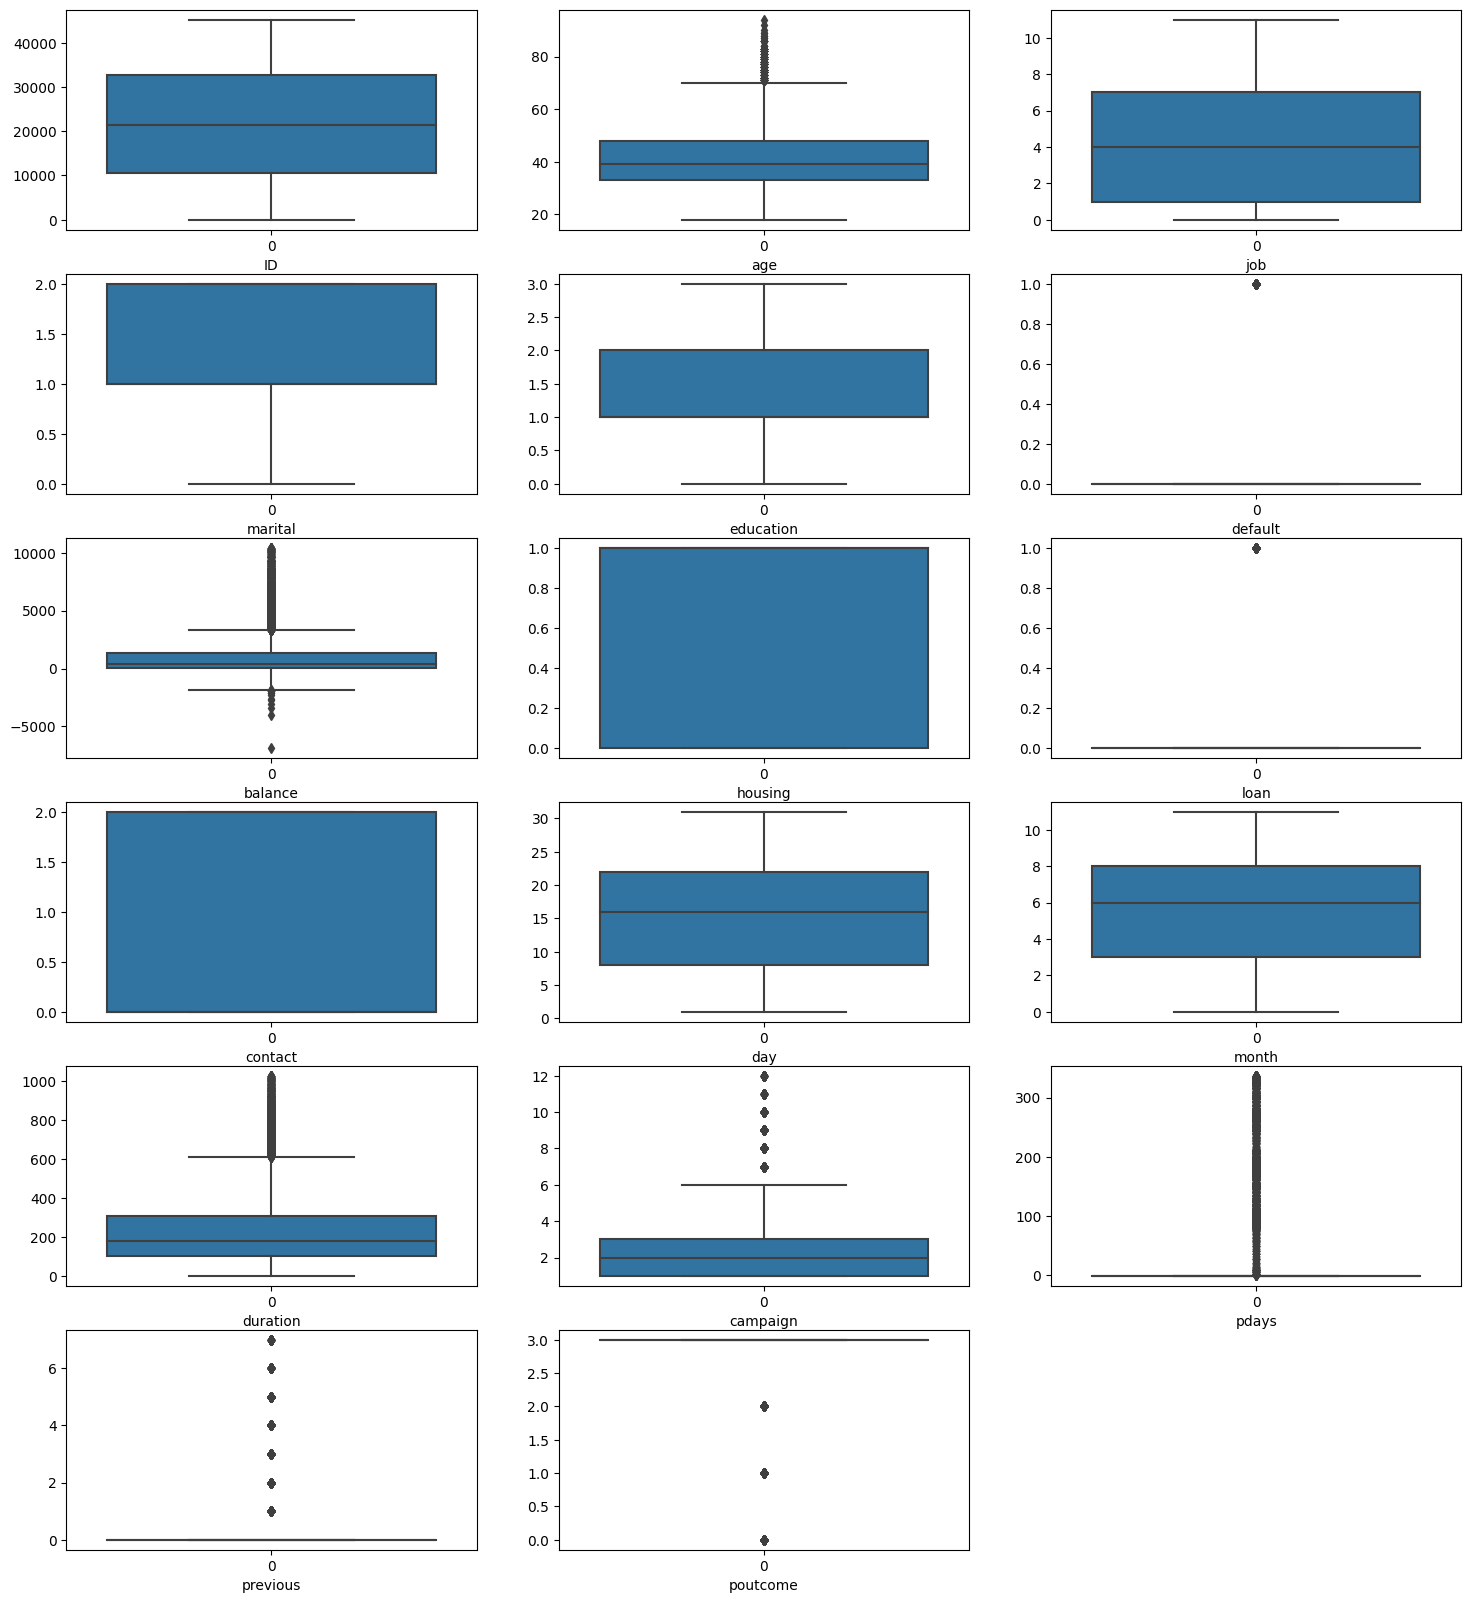

In [122]:
plt.figure(figsize = (18,20))
plotnumber = 1
for col in data2.columns:
    if plotnumber<=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(data2[col])
        plt.xlabel(col)
        plotnumber +=1

In [172]:
data2.drop(columns=['ID','contact'] , axis=1, inplace=True)

<Axes: >

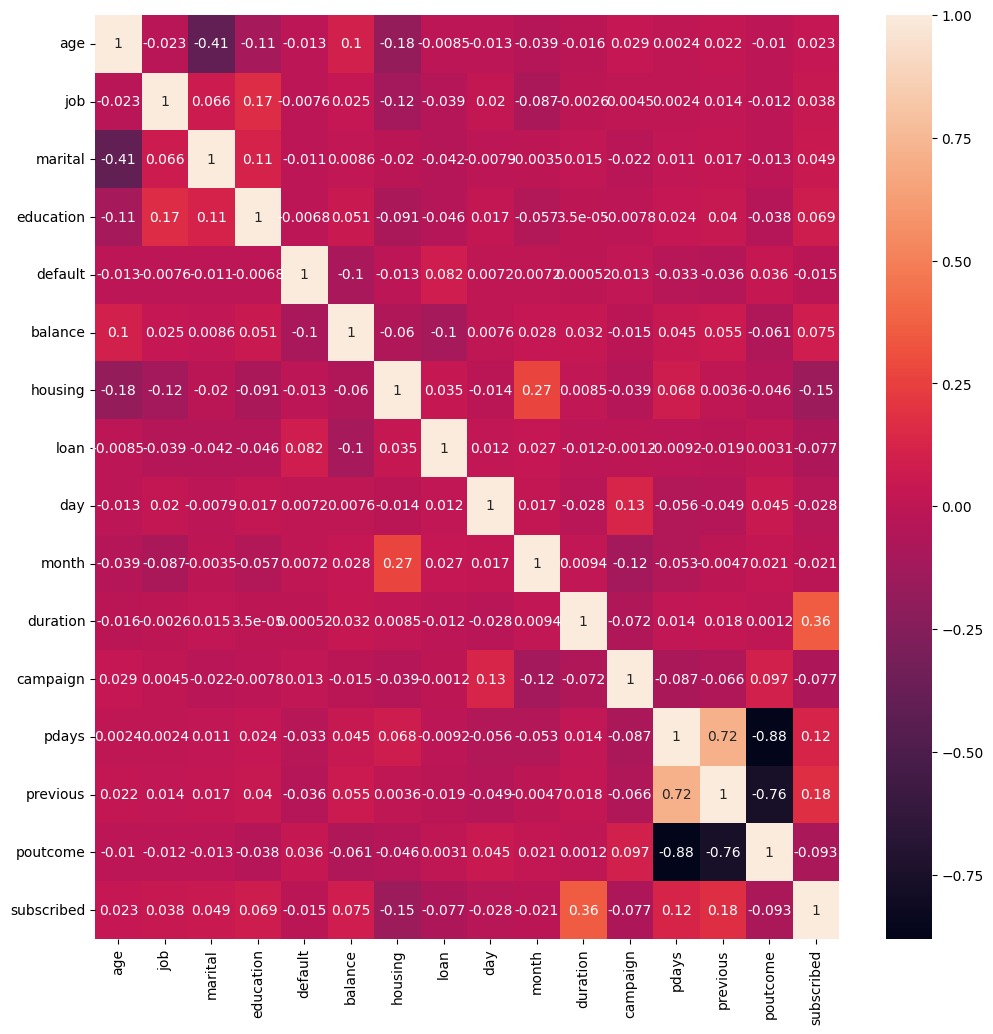

In [128]:
plt.figure(figsize = (12,12))
sns.heatmap(data2.corr(), annot=True)

In [130]:
corr = data2.corr()
corr['subscribed'].sort_values()

housing      -0.151405
poutcome     -0.092653
loan         -0.077455
campaign     -0.077270
day          -0.028494
month        -0.021009
default      -0.015489
age           0.023288
job           0.038099
marital       0.049292
education     0.068908
balance       0.074882
pdays         0.119893
previous      0.175844
duration      0.355597
subscribed    1.000000
Name: subscribed, dtype: float64

In [173]:
x = data2.drop('subscribed', axis=1)
y = data2['subscribed']

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [176]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [177]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns

In [178]:
vif

,VIF,Features
0,1.280528,age
1,1.048420,job
2,1.225050,marital
3,1.060276,education
4,1.017589,default
5,1.044569,balance
6,1.163388,housing
7,1.021778,loan
8,1.023297,day
9,1.117302,month


In [179]:
x_scaled.drop('poutcome', axis=1, inplace=True)

In [180]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns
vif

,VIF,Features
0,1.280477,age
1,1.048257,job
2,1.225048,marital
3,1.059691,education
4,1.017551,default
5,1.043358,balance
6,1.163249,housing
7,1.021249,loan
8,1.023024,day
9,1.115769,month


In [181]:
y.value_counts()

0    25410
1     2961
Name: subscribed, dtype: int64

In [182]:
from imblearn.over_sampling import SMOTE

In [183]:
sm = SMOTE()
x1, y1 = sm.fit_resample(x_scaled,y)

In [184]:
y1.value_counts()

0    25410
1    25410
Name: subscribed, dtype: int64

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [186]:
MaxAccu = 0
MaxRS = 0
for i in range(1,300):
  x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = accuracy_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Accuracy:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Accuracy: 0.8032926669290306 
 Best Random State: 10


In [187]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=MaxRS)

In [188]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score

**Random Forest Classifier**

In [193]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
RFCpred = RFC.predict(x_test)
print(accuracy_score(y_test,RFCpred))
print(confusion_matrix(y_test,RFCpred))
print(classification_report(y_test,RFCpred))

0.9066024436090225
[[7462  168]
 [ 627  255]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7630
           1       0.60      0.29      0.39       882

    accuracy                           0.91      8512
   macro avg       0.76      0.63      0.67      8512
weighted avg       0.89      0.91      0.89      8512



**Logistic Regression**

In [192]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
print(accuracy_score(y_test,LRpred))
print(confusion_matrix(y_test,LRpred))
print(classification_report(y_test,LRpred))

0.8956766917293233
[[7453  177]
 [ 711  171]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7630
           1       0.49      0.19      0.28       882

    accuracy                           0.90      8512
   macro avg       0.70      0.59      0.61      8512
weighted avg       0.87      0.90      0.87      8512



**Support Vector**

In [191]:
svc = SVC()
svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.902608082706767
[[7536   94]
 [ 735  147]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7630
           1       0.61      0.17      0.26       882

    accuracy                           0.90      8512
   macro avg       0.76      0.58      0.60      8512
weighted avg       0.88      0.90      0.88      8512



**Gradient Boosting**

In [190]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBCpred = GBC.predict(x_test)
print(accuracy_score(y_test,GBCpred))
print(confusion_matrix(y_test,GBCpred))
print(classification_report(y_test,GBCpred))

0.9067199248120301
[[7452  178]
 [ 616  266]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7630
           1       0.60      0.30      0.40       882

    accuracy                           0.91      8512
   macro avg       0.76      0.64      0.68      8512
weighted avg       0.89      0.91      0.89      8512



**Bagging**

In [189]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
BCpred = BC.predict(x_test)
print(accuracy_score(y_test,BCpred))
print(confusion_matrix(y_test,BCpred))
print(classification_report(y_test,BCpred))

0.9007283834586466
[[7384  246]
 [ 599  283]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7630
           1       0.53      0.32      0.40       882

    accuracy                           0.90      8512
   macro avg       0.73      0.64      0.67      8512
weighted avg       0.88      0.90      0.89      8512



**Cross Validation**

Here we can use the test dataset to check the models

In [194]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [196]:
test_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [197]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [198]:
le = LabelEncoder()
for i in test_data.columns:
  if data[i].dtype == 'object':
      data[i] = le.fit_transform(data[i])

In [199]:
x2 = test_data.drop(columns=['ID','contact','poutcome'], axis=1)
